In [64]:
%%html
<!DOCTYPE html>
<html>
  <head>
    <title>Title of the document</title>
    <style>
      marquee{
      font-size: 30px;
      font-weight: 800;
      color: red;
      font-family: sans-serif;
      }
    </style>
  </head>
  <body>
    <marquee>HAMOYE DATA SCIENCE INTERNSHIP 2020</marquee>
  </body>
</html>

In [65]:
%%html

<marquee>Oludolapo Ibrahim Olanrewaju ()</marquee>

<marquee direction="down">Introduction to Python</marquee>

<marquee direction="down" width="500" height="200" behavior="alternate" style="border:solid">
  <marquee behavior="alternate">
    Oludolapo Ibrahim Olanrewaju
  </marquee>
</marquee>

# Import Python Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get Data from Source

In [14]:
data_url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

electric_utility_data = pd.read_csv(data_url, error_bad_lines=False)


In [13]:
electric_utility_data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


 # Summarize the Entire Data

In [ ]:
electric_utility_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


# Check for Missing Values

In [17]:
missing_values = electric_utility_data.isnull().sum()
missing_values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

# Obtain Details of Features

In [ ]:
electric_utility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [18]:
electric_utility_data['fuel_unit'].value_counts().values

array([11354,  8958,  7998,   464,   180,   110,   100,    95,    84])

# Visualization with Bar Chart, KDE plot, Box plot and Regplot

(1, 16000)

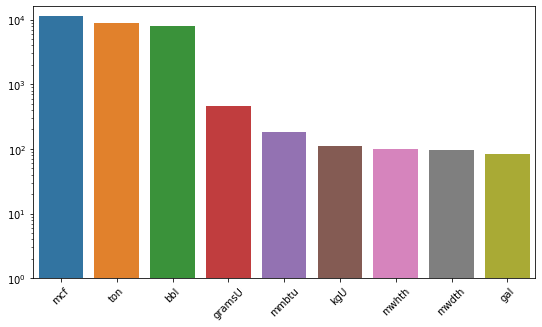

In [55]:
#Format figure
plt.figure(figsize = (9,5))
plt.xticks(rotation = 45)

barchart_visualization = sns.barplot(x=electric_utility_data['fuel_unit'].value_counts().index, y=electric_utility_data['fuel_unit'].value_counts().values)
barchart_visualization.set_yscale("log")
barchart_visualization.set_ylim(1, 16000)





In [ ]:
new_df = pd.pivot_table(electric_utility_data, index="fuel_type_code_pudl", values="fuel_cost_per_unit_burned", aggfunc='mean')

In [ ]:
new_df

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856
waste,19.518122


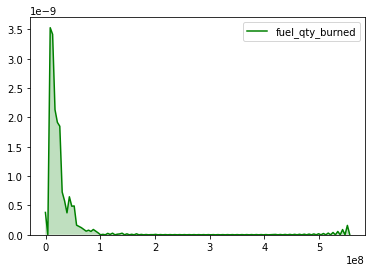

In [61]:
sns.kdeplot(data=electric_utility_data['fuel_qty_burned'], shade=True, color='green')

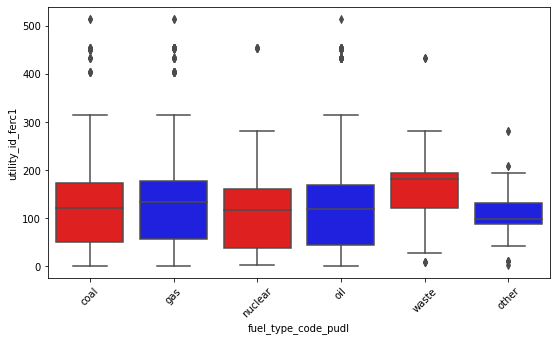

In [60]:
#Format figure
plt.figure(figsize = (9,5))
plt.xticks(rotation = 45)

sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1", palette=["r", "b"], data=electric_utility_data)


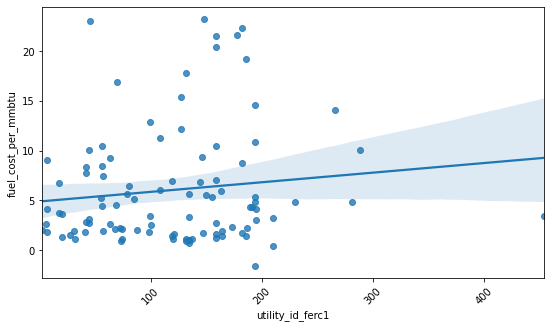

In [69]:
#Format figure
plt.figure(figsize = (9,5))
plt.xticks(rotation = 45)

# Select a sample of the dataset
dfx = electric_utility_data.sample(n=100, random_state=4)
sns.regplot(x=dfx["utility_id_ferc1"], y=dfx["fuel_cost_per_mmbtu"], fit_reg=True)


# Skewness

In [ ]:
skewness = electric_utility_data.skew()
skewness

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

# Kurtosis

In [ ]:
kurtosis = electric_utility_data.kurtosis()
kurtosis

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

# Percentage of Missing Values

In [38]:
missing_data_percentage = missing_values/len(electric_utility_data) * 100
missing_data_percentage

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

# Correlation and Visualization with Heatmap

In [ ]:
correlation = electric_utility_data.corr()
correlation['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

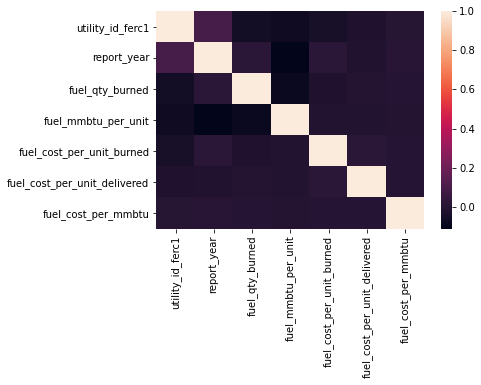

In [ ]:
sns.heatmap(correlation)

# Percentage Change in Coal Burned Between 1994 and 1998

In [31]:
coal_data = pd.pivot_table(electric_utility_data, index="fuel_type_code_pudl", columns="report_year", values="fuel_cost_per_unit_burned", aggfunc='sum')
coal_data

report_year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
fuel_type_code_pudl,,,,,,,,,,,,,,,,,,,,,,,,,
coal,14984.572,14571.785,12694.803,43742.178,11902.597,16303.468,100428.831,15109.012,9171.164,30954.110,9632.063,11107.182,12402.684,12965.171,14331.348,45554.858,88627.745,17001.015,17546.097,17629.860,15412.197,13338.235,11100.925,10254.284,9488.197
gas,10792.496,9087.905,1467.390,1518.471,7475.596,16767.895,10024.878,10360.348,3584.279,7170.143,5019.023,3833.652,3598.417,3867.366,16087.669,11193.089,4240.494,3264.968,3420.876,2982.281,4169.285,6224.304,1994.266,4424.244,4322.494
nuclear,227983.354,384152.639,66657.887,112593.911,117788.269,62915.808,112375.382,59292.078,59958.884,59591.536,61870.002,94192.368,141240.473,154945.333,226552.820,172823.881,202133.032,229824.926,240648.791,243192.226,229158.129,208830.486,213837.559,197491.493,173267.161
oil,9362.194,17858.281,5357.028,5387.536,2608.657,29654.510,104055.470,95315.421,48956.627,51349.250,107669.303,26401.284,30285.707,83766.316,56654.223,33068.327,35503.392,123477.065,59263.866,42336.964,268670.603,31038.094,28012.376,31935.723,33836.602
other,116.737,183.577,160.075,153.923,225.428,271.579,100.014,71.283,-4.257,-51.286,174.796,76.196,190.904,143.112,211.940,204.527,321.647,89.717,224.123,182.494,0.661,0.595,0.609,NaN,NaN
waste,52.762,-192.699,88.092,137.433,238.109,143.025,-489.141,217.499,254.438,161.973,272.512,313.457,423.847,427.014,474.022,739.884,755.157,517.912,589.791,609.411,591.594,629.270,539.079,452.079,660.972


In [37]:
percentage_burned = (((11902.597 - 14984.572)/14984.572) * 100)
percentage_burned




-20.567654518260518

# Get the Highest Value for cost_per_unit_delivered

In [28]:
cost_per_unit_delivered = pd.pivot_table(electric_utility_data, index="report_year", values="fuel_cost_per_unit_delivered", aggfunc='sum')

max_value = cost_per_unit_delivered.max()

max_value


fuel_cost_per_unit_delivered    12187375.78
dtype: float64